Imports

In [39]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

Set random seeds for reproducibility

In [40]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Load Data

In [53]:
# Method 1: Load Data from Files (Commented Out)
"""
# Load the dataset from a file
dataset = np.loadtxt('train.csv', delimiter=',', skiprows=1)
X = dataset[:, 1:]
y = dataset[:, 0]

# Normalize the training data
X = X / 255.0  # Normalize pixel values to [0, 1]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)  # Class indices should be int64

# Load the test dataset
test_data_path = 'test.csv'
test_df = pd.read_csv(test_data_path)
test_X = test_df.values
test_X = test_X / 255.0  # Normalize pixel values to [0, 1]
test_X = torch.tensor(test_X, dtype=torch.float32)
"""

"\n# Load the dataset from a file\ndataset = np.loadtxt('train.csv', delimiter=',', skiprows=1)\nX = dataset[:, 1:]\ny = dataset[:, 0]\n\n# Normalize the training data\nX = X / 255.0  # Normalize pixel values to [0, 1]\n\nX = torch.tensor(X, dtype=torch.float32)\ny = torch.tensor(y, dtype=torch.int64)  # Class indices should be int64\n\n# Load the test dataset\ntest_data_path = 'test.csv'\ntest_df = pd.read_csv(test_data_path)\ntest_X = test_df.values\ntest_X = test_X / 255.0  # Normalize pixel values to [0, 1]\ntest_X = torch.tensor(test_X, dtype=torch.float32)\n"

In [42]:
# Method 2: Import MNIST Dataset using PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Define PyTorch Model

In [43]:
# Define PyTorch Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

Define Loss Function and Optimizers

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

Run a Training Loop

In [46]:
# Training the network
epochs = 1
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1, Loss: 0.2513615007240222
Finished Training


Evaluate the Model

In [47]:
# Evaluating the network
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 95.28%


Visualize

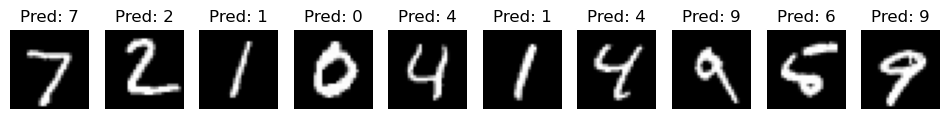

In [52]:
# Visualize some test results
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images and predictions
outputs = net(images)
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 10, figsize=(12, 2.5))
for i in range(10):
    ax = axes[i]
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predicted[i].item()}')
    ax.axis('off')
plt.show()